In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# inline - to see diagrams in notebook
# diagrams seen here are only for pandas module, more advanced ones are in matplotlib tutorials

In [2]:
bar = pd.read_csv("./weather_barcelona.csv", index_col='Date')
ams = pd.read_csv("./weather_amsterdam.csv", index_col='Date')
rom = pd.read_csv("./weather_rome.csv", index_col='Date')

In [3]:
temp_max = pd.DataFrame(index=bar.index)
temp_max['Barcelona'] = bar['TempMax']
temp_max['Amsterdam'] = ams['TempMax']
temp_max['Rome'] = rom['TempMax']

In [4]:
def GradeDay(row):
    if row['TempMax'] >= row['AvgTempMax']:
        return 'PLUS'
    else:
        return 'MINUS'

In [5]:
rom['GradeDay'] = rom.apply(GradeDay, axis=1)
bar['GradeDay'] = bar.apply(GradeDay, axis=1)
ams['GradeDay'] = ams.apply(GradeDay, axis=1)

In [6]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [7]:
rom['GradeDay'].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [8]:
cities3 = pd.DataFrame(index=['MINUS','PLUS'])

In [9]:
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()

In [10]:
cities3

,Barcelona,Amsterdam,Rome
MINUS,26,22,20
PLUS,64,68,70


<AxesSubplot:>

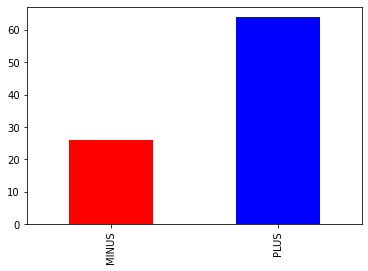

In [14]:
cities3['Barcelona'].plot(kind='bar',color=['r','b'])

<AxesSubplot:>

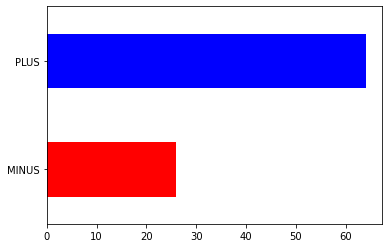

In [15]:
cities3['Barcelona'].plot(kind='barh',color=['r','b'])

<AxesSubplot:>

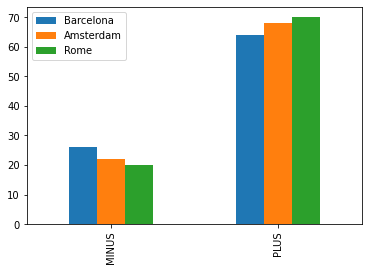

In [17]:
cities3.plot(kind='bar')

<AxesSubplot:>

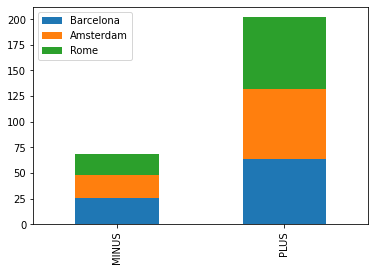

In [18]:
cities3.plot(kind='bar',stacked=True)

In [19]:
temp_max

,Barcelona,Amsterdam,Rome
Date,,,
2018-01-01,17,8,14
2018-01-02,19,9,13
2018-01-03,23,11,14
2018-01-04,24,11,16
2018-01-05,20,8,17
...,...,...,...
2018-03-27,16,10,16
2018-03-28,20,8,17
2018-03-29,17,11,19


<AxesSubplot:>

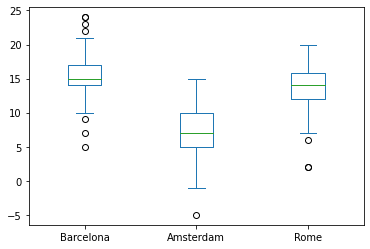

In [20]:
temp_max.plot(kind='box')

## Description:
1. Median is horizontal line in box.
2. Vertical lines going up and down from the box are max and min values.
3. 4 quantiles
4. Small box and vertical lines - values around median
5. Dots are outliers - https://medium.com/@agarwal.vishal819/outlier-detection-with-boxplots-1b6757fafa21

We can modify color as well, but that's not so important.

<AxesSubplot:ylabel='Frequency'>

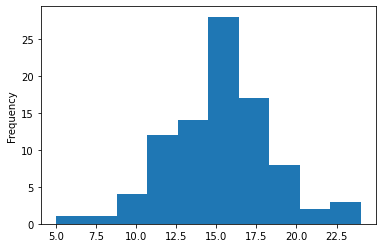

In [21]:
bar['TempMax'].plot(kind='hist')

In [23]:
bar['TempMax'].value_counts().sort_index() # as we see on histogram functions round some values, we should use 18 values

5      1
7      1
9      1
10     3
11     4
12     8
13     4
14    10
15    17
16    11
17     9
18     8
19     4
20     4
21     1
22     1
23     1
24     2
Name: TempMax, dtype: int64

<AxesSubplot:ylabel='Frequency'>

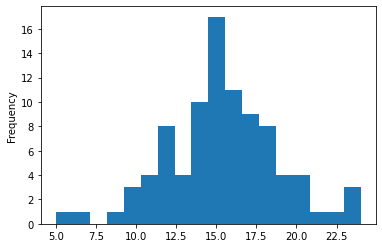

In [25]:
bar['TempMax'].plot(kind='hist', bins=18) # now its good